# ???

This demo is supposed to visualize ???. 

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on signals and systems hold at the [university of applied siences, Berlin](https://www.htw-berlin.de/).

**import libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fig_heigths = 3
plt.rcParams['figure.figsize'] = (fig_heigths*1.6, fig_heigths)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 150

---
**generate rect signal**

In [8]:
sr = 100 # sample rate

T0 = 0.5 # width of rectangle in s
T = 1 # repetition period in s 
dutyCyle = T0 / T # duty cycle of rect

t = np.arange(0, 5, 1 / sr)
f = np.fft.fftshift(np.fft.fftfreq(t.size, 1 / sr))

# generate signal
data = np.zeros(t.size)

# symmetric periodic rect-signal
# data[(t % T) < (dutyCyle * T / 2)] = 1
# data[(t % T)>(T-dutyCyle*T/2)] = 1

# asymmetric periodic rect-signal
# data[(t % T) < (dutyCyle * T)] = 1

# asymmetric rect-signal
data[(t > (T-T0/2)) & (t < (T+T0/2))] = 1



---
**plot signal**

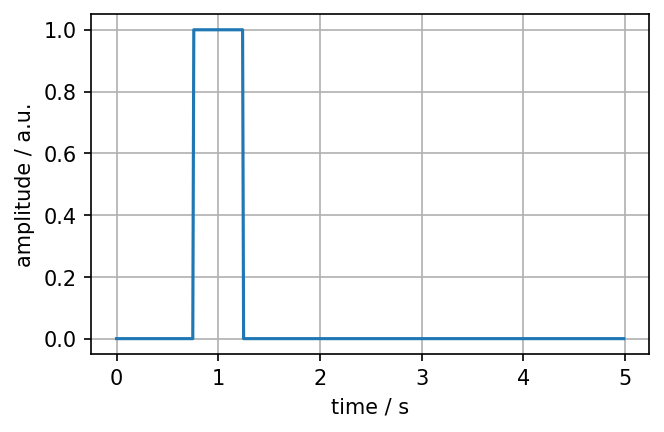

In [9]:
plt.plot(t, data)
plt.xlabel('time / s')
plt.ylabel('amplitude / a.u.')
plt.show()

---
**generate and plot impulse response**

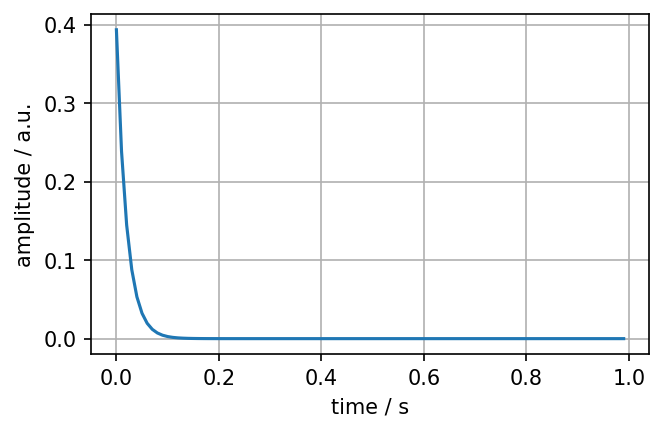

In [10]:
# decay rate
alpha = -50
# exponential decaying h of length 1 s
h = np.exp(alpha * t[:sr])
h = h / np.sum(h)

plt.plot(t[:sr],h)
plt.xlabel('time / s')
plt.ylabel('amplitude / a.u.')
plt.grid(True)
plt.show()

---
**filter signal and plot filtered signal**

$y(t)=x(t)\ast h(t)$

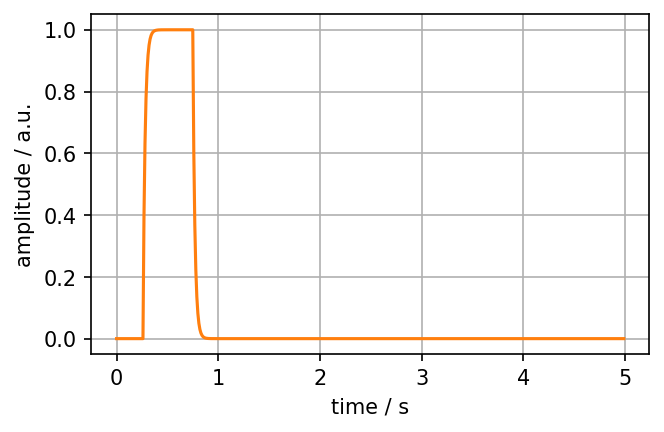

In [11]:
dataFilt = signal.convolve(data, h, 'same')

# dataEye = np.reshape(dataFilt, (T*sr, -1), 'F')

fig, ax = plt.subplots(1, 1)
ax.plot(t, dataFilt, 'C1')
ax.set_xlabel('time / s')
ax.set_ylabel('amplitude / a.u.');